# Instantaneous Frequency
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [instantaneous_frequency_FM.ipynb](https://github.com/diegoinacio/computer-vision-notebooks/blob/master/Digital-Signal-Processing/instantaneous_frequency_FM.ipynb)
---
Analytical approach to continuous *Instantaneous Frequency* and *Frequency Modulation*.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy as np

from _utils import *

In [2]:
fs = 44100   # sampling rate 44.1 kHz
T = 3        # duration in seconds
t = np.linspace(0, T, fs*T)

## 1. Instantaneous frequency
---
A modulated signal can be expressed as:
$$ \large
x(t)=a(t)\cos(\phi(t))
$$
where:
- The *instantaneous amplitude* or envelope is given by $\large a(t)$;
- The *instantaneous phase* is given by $\large \phi(t)$;
- The *instantaneous angular frequency* is given by $\large \omega(t)=\frac{d}{dt}\phi(t)$;
- The *instantaneous ordinary frequency* is given by $\large f(t)=\frac{1}{2\pi}\frac{d}{dt}\phi(t)$.

## 2. Examples
---
Modulation using instantaneous frequency

### 2.1. Linear frequency modulation
---
Given a *modulation frequency*, defined by:

$$ \large
f(t)=f_a+\frac{(f_b-f_a)t}{T}
$$

where $f(t)$ is linearly interpolated from $f_a$ to $f_b$.

In [3]:
fa = 880      # frequency A
fb = 100      # frequency B

# Linear interpolation from fa to fb
ft = fa + (fb - fa)*t/T

audio mono


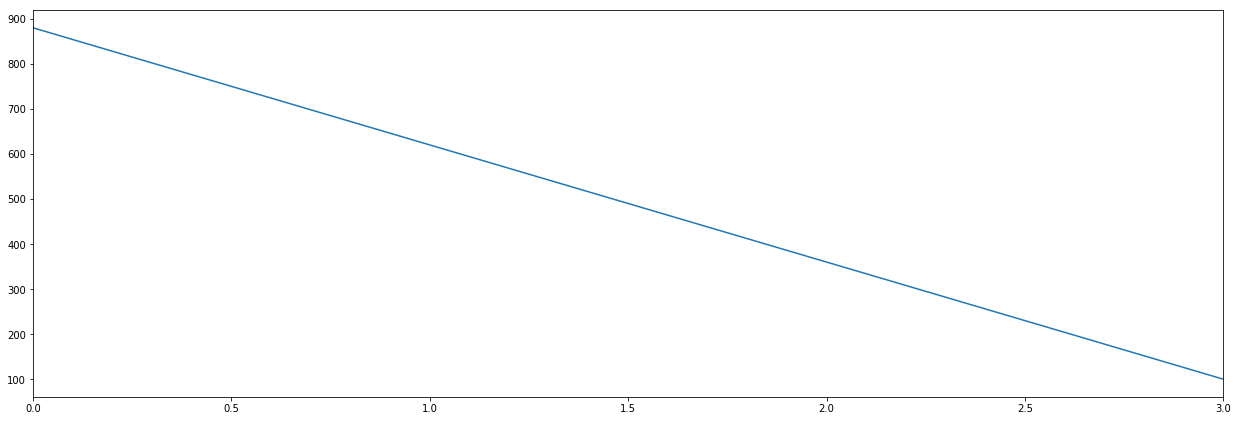

In [4]:
audiovis(ft)

The modulated signal whithout instantaneous frequency is:

$$ \large
x(t)=sin(2\pi f(t)t)
$$

In this example the carrier frequency is zero ($\phi_c=0$).

In [5]:
xt = np.sin(2*np.pi*ft*t)
Audio(xt, rate=fs)

audio mono


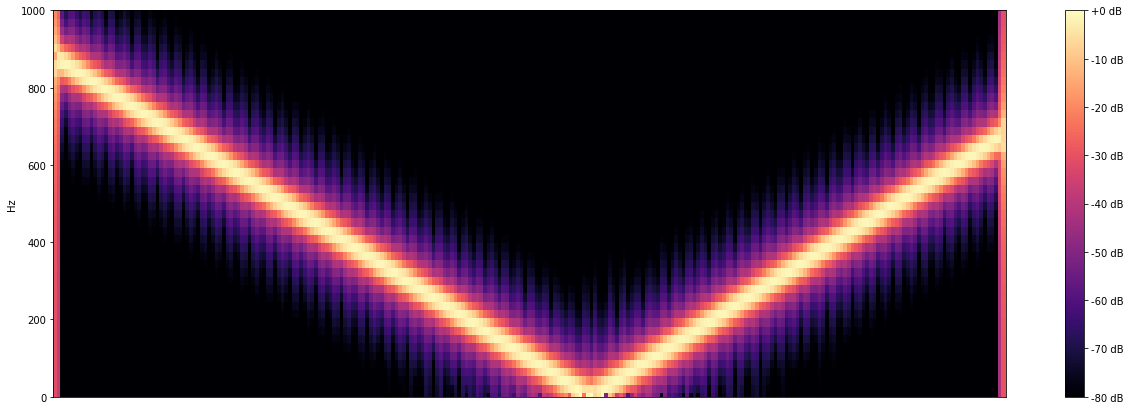

In [6]:
spectrogram(xt, flim=[0, 1000])

If we considere:

$$ \large
\phi(t)=\int\omega(t)dt=2\pi\int f(t)dt
$$

the modulated signal by the *instantaneous frequency* could be expressed by:

$$ \large
x_m(t)=sin(\phi(t))=sin\left(2\pi\left[f_at+\frac{(f_b-f_a)t^2}{2T}\right]\right)
$$

In [7]:
xm = np.sin(2*np.pi*(fa*t + (fb - fa)*t**2/(2*T)))
Audio(xm, rate=fs)

audio mono


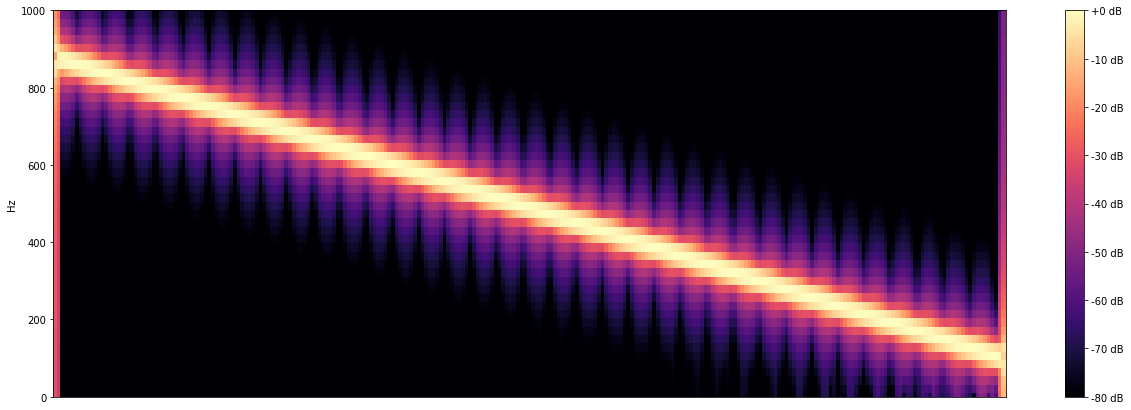

In [8]:
spectrogram(xm, flim=[0, 1000])

### 2.2. Exponencial frequency modulation
---
$$ \large
f(t)=f_a+\frac{f_b-f_a}{1+e^{-k\left(\frac{t}{T}-\frac{1}{2}\right)}}
$$

$f(t)$ is a mudulation frequency which interpoles from $f_a$ to $f_b$ exponentially. It's inspired by the *sigmoid function* where $k$ is the slope of the middle point.

In [9]:
fa = 880      # frequency A
fb = 100      # frequency B
k = 12        # slope of the middle point

e_k = np.exp(-k*(t/T - 1/2))

# Exponential interpolation
ft = fa + (fb - fa)/(1 + e_k)

audio mono


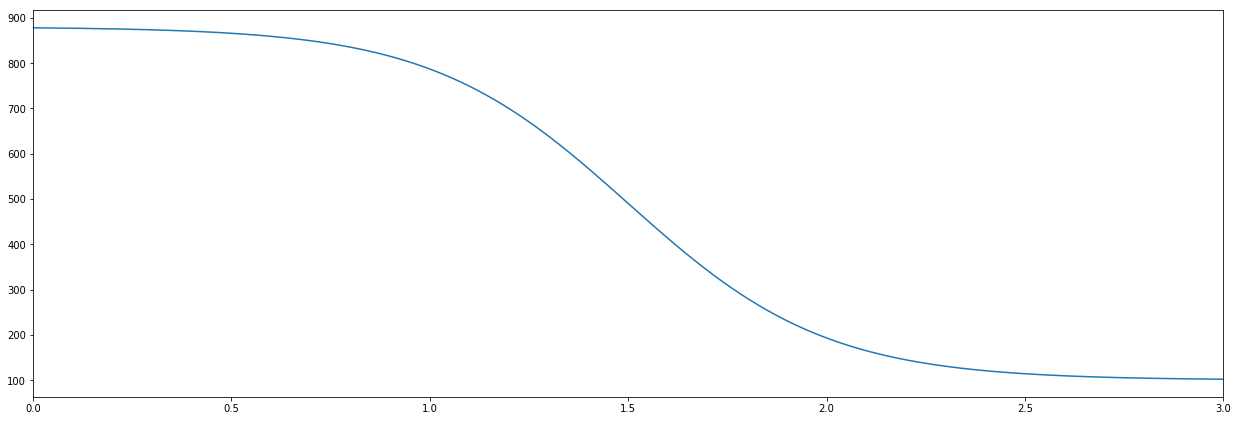

In [10]:
audiovis(ft)

In [11]:
xt = np.sin(2*np.pi*ft*t)
Audio(xt, rate=fs)

audio mono


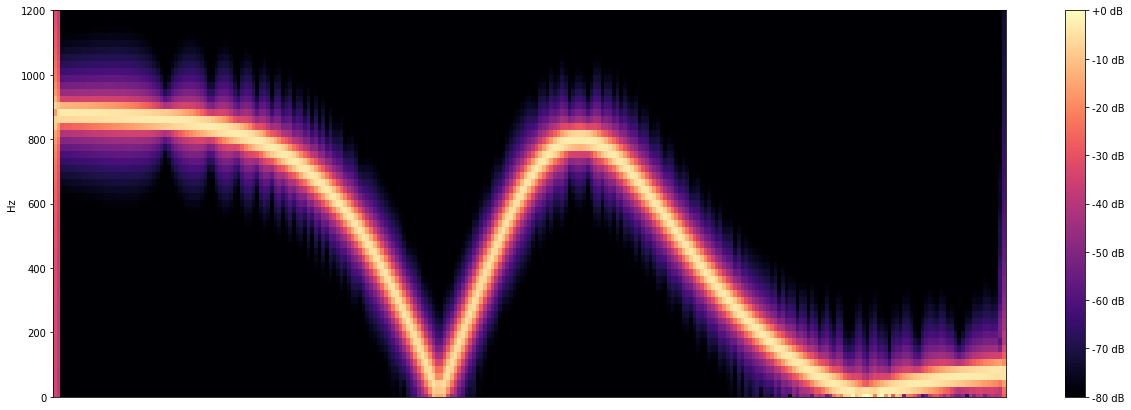

In [12]:
spectrogram(xt, flim=[0, 1200])

The modulated signal by the *instantaneous frequency* could be expressed by:

$$ \large
x_m(t)=sin(\phi(t))=sin\left(2\pi\left[f_at-\frac{(f_b-f_a)T}{k}\left[\ln(e^{-k\left(\frac{t}{T}-\frac{1}{2}\right)}) - \ln(e^{-k\left(\frac{t}{T}-\frac{1}{2}\right)}+1)\right]\right]\right)
$$

In [13]:
xm = np.sin(2*np.pi*(fa*t - (fb - fa)*T/k*(np.log(e_k) - np.log(e_k + 1))))
Audio(xm, rate=fs)

audio mono


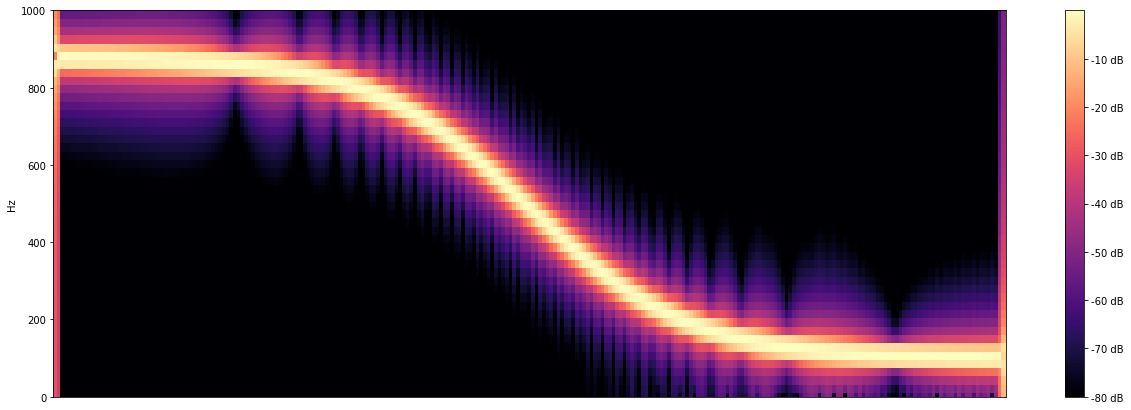

In [14]:
spectrogram(xm, flim=[0, 1000])

### 2.3. Sinusoidal frequency modulation

---
$$ \large
f(t)=f_a+\frac{f_b-f_a}{2}[sin(2\pi f_m t) + 1]
$$

$f(t)$ is a mudulation frequency which oscillates from $f_a$ to $f_b$ given a sinusoidal function where $f_m$ is the ordinary froquency.

In [15]:
fa = 110      # frequency A
fb = 440      # frequency B
fm = 1        # oscillator's ordinary frequency

# frequency oscillator
ft = fa + (fb - fa)/2*(np.sin(2*np.pi*fm*t) + 1)

In [16]:
summary(ft)


       min:        110.0000
  1st Quar:        158.3288
    median:        275.0000
      mean:        275.0000
  3rd Quar:        391.6712
       max:        440.0000
     sigma:        116.6722


audio mono


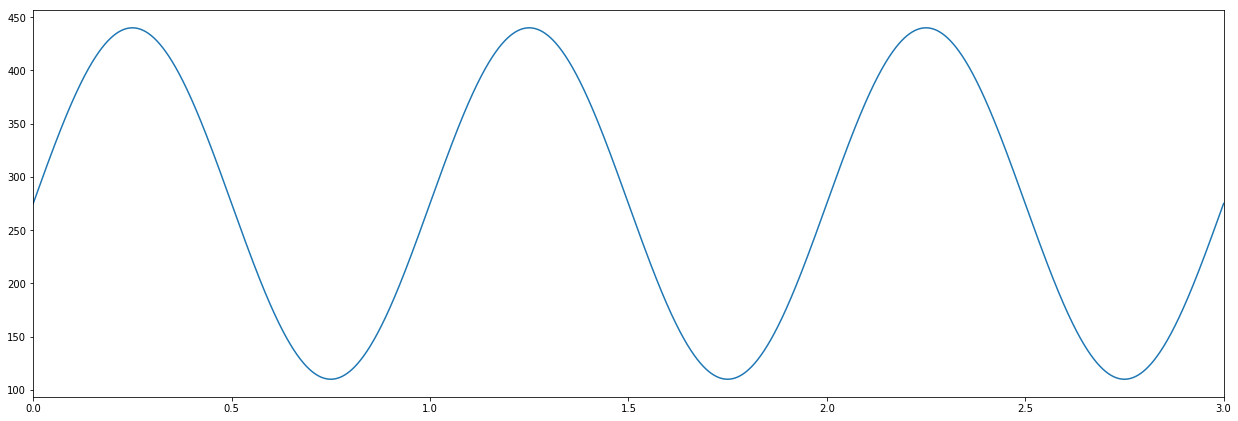

In [17]:
audiovis(ft)

In [18]:
xt = np.sin(2*np.pi*ft*t)
Audio(xt, rate=fs)

audio mono


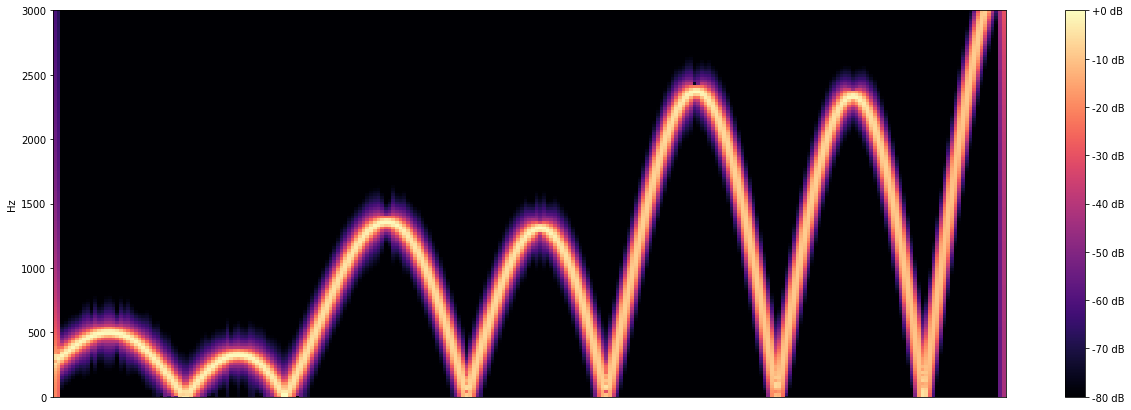

In [19]:
spectrogram(xt, flim=[0, 3000])

The modulated signal by the *instantaneous frequency* could be expressed by:

$$ \large
x_m(t)=sin(\phi(t))=sin\left(2\pi\left[f_at+\frac{f_b-f_a}{2}\left[-\frac{cos(2\pi f_m t)}{2\pi f_m}+t\right]\right]\right)
$$

In [20]:
xm = np.sin(2*np.pi*(fa*t + (fb - fa)/2*(-np.cos(2*np.pi*fm*t)/(2*np.pi*fm) + t)))
Audio(xm, rate=fs)

audio mono


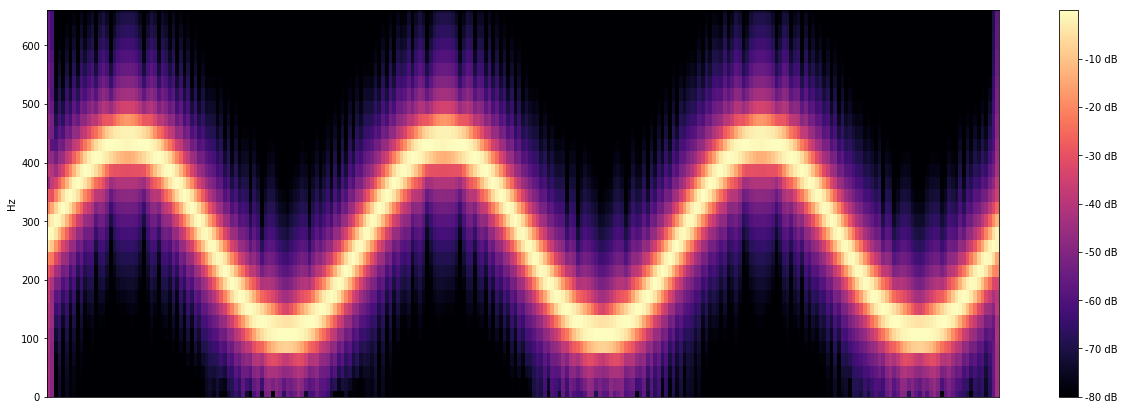

In [21]:
spectrogram(xm, flim=[0, 660])